![Icon](Images/Icon.jpg)

# Movie Studio Insights

# Overview

Our company has decided to start a new movie studio to join the growing trend of original video content. However, we don’t have much experience in the film industry. To help guide this new venture, we were asked to research what kinds of movies are currently doing well at the box office.

This project explores recent movie data to find out which film genres, release times, and other factors are most linked to success. We also look at things like budget, cast, and audience ratings to understand what makes a movie perform well.

The goal is to turn this information into simple, clear insights and recommendations that the studio can use to decide what types of films to produce. By using real data, we aim to give the new movie studio a strong and smart starting point.

# Business Understanding
The primary goal of this project is to help our company’s new movie studio make informed decisions about the types of films it should produce. With major studios seeing success through data-driven content strategies, we aim to explore recent box office trends to identify which film genres, themes, and production strategies are currently performing best. Our insights will translate directly into actionable recommendations—enabling the studio to compete effectively in the modern entertainment landscape.

# Data Understanding
To gain a comprehensive view of the market, we collected data from multiple reliable sources such as Box Office Mojo, The Numbers, IMDb, and Rotten Tomatoes. For this analysis we're going to use the IMDb dataset since it provide a bigger population. Our focus will be on columns : movie_basics and movie_ratings which are the most relevant.
This data will help us assess what types of films resonate most with audiences both commercially and critically.

##### - PS : PDFs (Notebook.pdf, Presentation.pdf) are stored inside /PDFs folder

Let's explore the structure of the dataset

In [85]:
# Essential imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Display settings
pd.set_option('display.max_columns', 100)
sns.set(style="whitegrid")

# connecting to the im.db database
conn = sqlite3.connect('Data/im.db')

# let's do basic check on the database
table_names = pd.read_sql("""SELECT name from sqlite_master where type = 'table';""", conn)


table_names

,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers
8,cleaned_movies
9,Data/cleaned_movies


#### Let's observe the structure of our dataset

##### Let's start by movie_basics.

In [86]:
# understand the structure of movie_basics table
movie_basics = pd.read_sql("""SELECT * FROM movie_basics """,conn)
movie_basics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [87]:
# Display 5 first rows of movie_basics table
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [88]:
# Display 5 last rows of movie_basics table
movie_basics.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [89]:
# count how many null value we have in the movie_basics table
movie_basics.isnull().sum()

movie_id               0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [90]:
runtime_percent = movie_basics['runtime_minutes'].isnull().sum()/movie_basics['runtime_minutes'].sum()
print(f"Per our first observation, we can see that the column `runtime_minutes` has {movie_basics['runtime_minutes'].isnull().sum()} null values over {movie_basics['runtime_minutes'].count()}, {movie_basics['original_title'].isnull().sum()} missing `original_title` over {movie_basics['original_title'].count()} \n and {movie_basics['genres'].isnull().sum()} missing `genres` over {movie_basics['genres'].count()}.")

Per our first observation, we can see that the column `runtime_minutes` has 31739 null values over 114405, 21 missing `original_title` over 146123 
 and 5408 missing `genres` over 140736.


In [91]:
# Statistics about the dataframe
movie_basics.describe()

,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


##### Let's do the same for movie_rating since we are going to use both tables.

In [92]:
# understand the structure of movie_ratings table
rating = pd.read_sql("""SELECT * FROM movie_ratings """,conn)
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [93]:
# Display 5 first rows of movie_ratings table
rating.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [94]:
# Display 5 last rows of movie_ratings table
rating.tail()

,movie_id,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


In [95]:
# count how many null value we have in the rating table
rating.isnull().sum()

movie_id         0
averagerating    0
numvotes         0
dtype: int64

Fortunately we don't have null value for the rating table, from here we can have a better filtering. Let's see how entries are distributed around the dataframe.

In [96]:
# Statistics about the dataframe
rating.describe()

,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


##### General Observation
###### `start_year`
- Most entries are within 2–3 years of the mean → this is tightly clustered around 2012–2017.
- The max value 2115 is likely a data entry error — it could be 2015 mistyped. This should be flagged for cleaning.
- Most titles started around 2014–2015.
###### `runtime_minutes`
- Average runtime is around 86 minutes — a standard length for movies.
- Very high standard deviation → strong presence of outliers.
- There are titles that are only 1 minute long — probably shorts or misentered.
- Extremely abnormal — 51420 minutes = ~36 days, likely a data error.
- Median is close to the mean → distribution is not strongly skewed, but affected by outliers.
###### `averagerating`
- No obvious outliers here in terms of scale.
- Everything seems ok with this column
###### `averagerating`
- Most movies are not well-voted, so their average ratings are likely unreliable
- Range: 5 to 1,841,066 — huge spread.
- Median (50%) is just 49 votes.
- 75th percentile is 282 votes — meaning 75% of movies have < 300 votes.


# Data Preparation
Before analysis, let's perform a our first filter by creating a new dataset with deside entry. At the same time we will remove duplicate entries, fixed inconsistent genre labeling, and corrected invalid values ( date type and number type ).

In [97]:
# create the new dataset
query = """
SELECT 
    mb.movie_id,
    mb.primary_title,
    mb.original_title,
    mb.start_year,
    mb.runtime_minutes,
    mb.genres,
    mr.averagerating,
    mr.numvotes
FROM 
    movie_basics mb
JOIN 
    movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE 
    mb.start_year BETWEEN 2010 AND 2025
    AND mr.numvotes >= 50
"""
df = pd.read_sql(query, conn)
df

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
2,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
3,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263
4,tt0146592,Pál Adrienn,Pál Adrienn,2010,136.0,Drama,6.8,451
...,...,...,...,...,...,...,...,...
36819,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
36820,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505
36821,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600
36822,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365


In [98]:
df.describe()

,start_year,runtime_minutes,averagerating,numvotes
count,36824.000000,35367.000000,36824.000000,3.682400e+04
mean,2014.277726,99.777193,5.981477,7.049307e+03
std,2.588292,79.660014,1.378405,4.261306e+04
min,2010.000000,8.000000,1.000000,5.000000e+01
25%,2012.000000,87.000000,5.200000,1.100000e+02
50%,2014.000000,95.000000,6.200000,2.840000e+02
75%,2016.000000,108.000000,7.000000,1.090000e+03
max,2019.000000,14400.000000,9.900000,1.841066e+06


In [99]:
df.tail()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
36819,tt9904844,Ott Tänak: The Movie,Ott Tänak: The Movie,2019,125.0,Documentary,8.7,218
36820,tt9905412,Ottam,Ottam,2019,120.0,Drama,8.1,505
36821,tt9905462,Pengalila,Pengalila,2019,111.0,Drama,8.4,600
36822,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365
36823,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


##### `runtime_minutes` Max is 14,400 min (10 days) — likely a data entry error. Typical movies are 30–240 min, so we can filter accordingly.

In [100]:
df = df[(df['runtime_minutes'] >= 30) & (df['runtime_minutes'] <= 240)]

##### `numVotes` Highly skewed: from 50 to 1.8M.

In [101]:
# Consider log transformation or binning.
df['log_votes'] = np.log10(df['numvotes'])

In [102]:
#filter extreme outliers since we're focusing on general trends

Q1 = df['log_votes'].quantile(0.25)
Q3 = df['log_votes'].quantile(0.75)
IQR = Q3 - Q1

lower_log = Q1 - 1.5 * IQR
upper_log = Q3 + 1.5 * IQR

# We filter between where data is more clustered Q3 - Q1, in oder to avoid outliers.

df_filtered_log = df[(df['log_votes'] >= lower_log) & (df['log_votes'] <= upper_log)]
df_filtered_log.describe()

,start_year,runtime_minutes,averagerating,numvotes,log_votes
count,34032.000000,34032.000000,34032.000000,34032.000000,34032.000000
mean,2014.298572,98.631582,5.959991,1620.772596,2.582539
std,2.583445,20.448534,1.373989,4274.636866,0.661623
min,2010.000000,30.000000,1.000000,50.000000,1.698970
25%,2012.000000,86.000000,5.200000,111.000000,2.045323
50%,2014.000000,95.000000,6.100000,282.000000,2.450249
75%,2017.000000,107.000000,6.900000,959.000000,2.981819
max,2019.000000,240.000000,9.900000,38160.000000,4.581608


##### Now we can use `log_votes` instead of `numvotes` to analyse how data is spread across the dataframe

# Data Analysis
Since we have already done several cleaning and filtering process uppon the dataset, we can now use it into visualization to interpret data.

# Visualization

##### Distribution Plots

<Axes: xlabel='averagerating', ylabel='Count'>

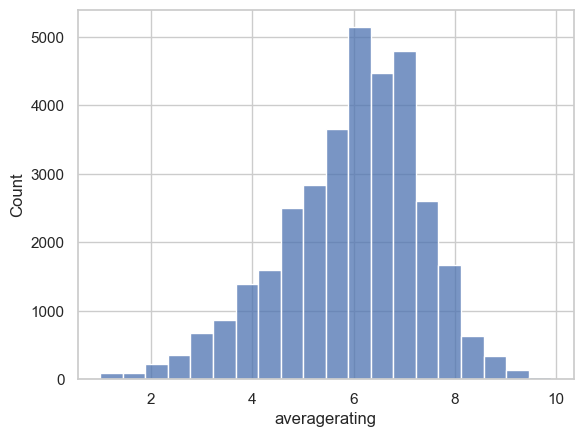

In [103]:
# Rating Distribution
sns.histplot(df_filtered_log['averagerating'], bins=20)

##### As we can see here, the average rating value is around 6

<Axes: xlabel='runtime_minutes', ylabel='Count'>

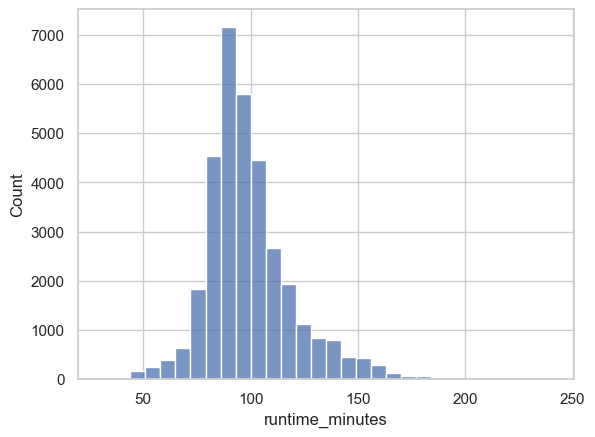

In [104]:
# Runtime
sns.histplot(df_filtered_log['runtime_minutes'], bins=30)

##### The average runtime in minutes for a movie is around 90

<Axes: xlabel='log_votes', ylabel='Count'>

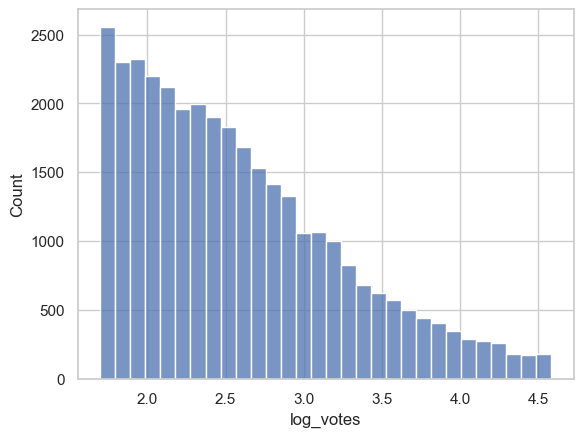

In [105]:
# Log NumVotes
sns.histplot(df_filtered_log['log_votes'], bins=30)

##### The distribution of votes per group of voters

##### Correlation

In [106]:
df_filtered_log[['runtime_minutes', 'averagerating', 'numvotes']].corr()

,runtime_minutes,averagerating,numvotes
runtime_minutes,1.000000,0.136364,0.132197
averagerating,0.136364,1.000000,0.078315
numvotes,0.132197,0.078315,1.000000


#### None of these paramaters are strongly correlated with each other

##### Rating Trend Over years

Text(0.5, 1.0, 'Rating Trends per Year')

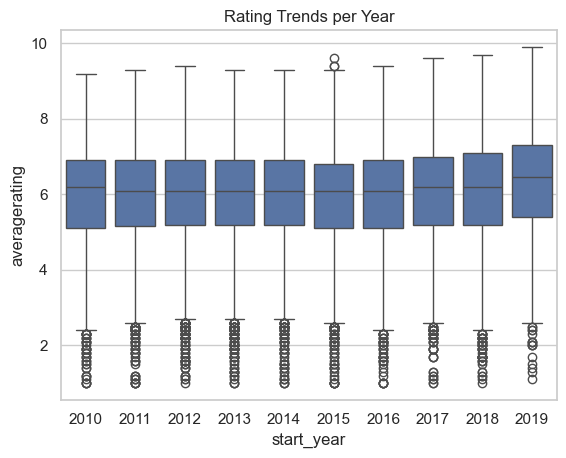

In [107]:
sns.boxplot(x='start_year', y='averagerating', data=df_filtered_log)
plt.title("Rating Trends per Year")

##### The rating trend follows a normal distribution around 5 to 7 across the years with some outliers

##### Top Genres by Rating 

In [108]:
df_filtered_log['main_genre'] = df_filtered_log['genres'].str.split(',').str[0]
df_filtered_log.groupby('main_genre')['averagerating'].mean().sort_values(ascending=False).head(10)

main_genre
Documentary    7.133446
Biography      6.929235
Music          6.774194
Musical        6.711538
Sport          6.447059
Animation      6.322454
Drama          6.178917
Romance        5.976452
Adventure      5.947871
Crime          5.926625
Name: averagerating, dtype: float64

##### The most rated Genre is `Documentary` followed by `Biography`, `Music`, `Musical` and `Sport` as to 5 most rated

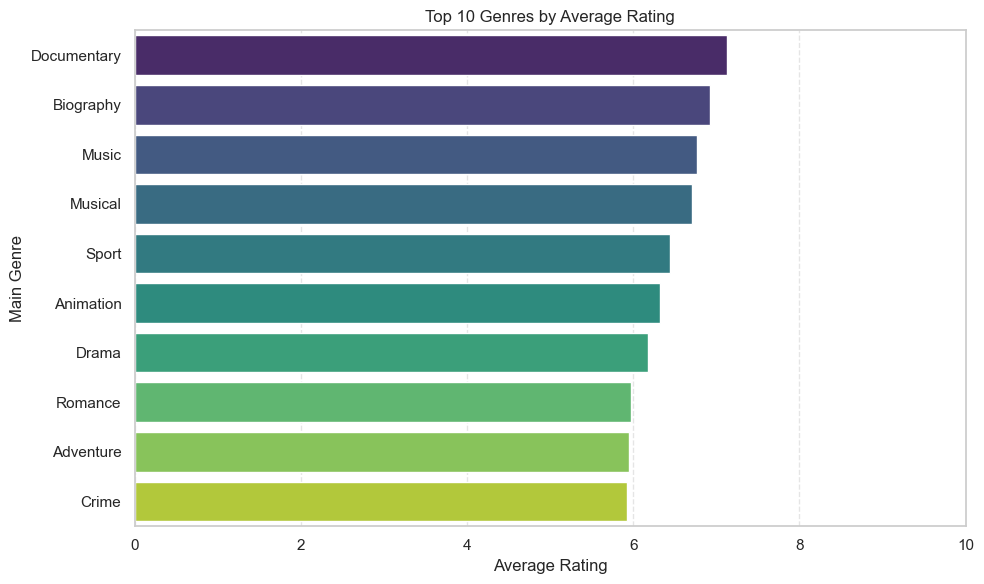

In [109]:
top_genres = df_filtered_log.groupby('main_genre')['averagerating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.values, y=top_genres.index, palette="viridis")

plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Main Genre")
plt.xlim(0, 10)  # ratings usually range 0–10
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

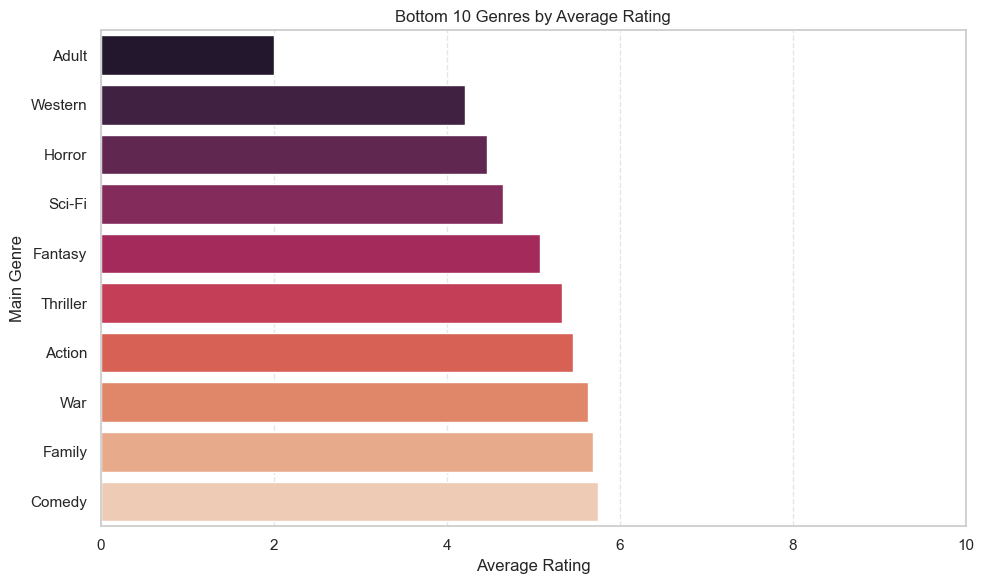

In [110]:
bottom_genres = df_filtered_log.groupby('main_genre')['averagerating'].mean().sort_values(ascending=True).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=bottom_genres.values, y=bottom_genres.index, palette="rocket")

plt.title("Bottom 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Main Genre")
plt.xlim(0, 10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

##### The worst genre to try would be adult

##### Runtime vs Rating

Text(0.5, 1.0, 'Runtime vs Rating')

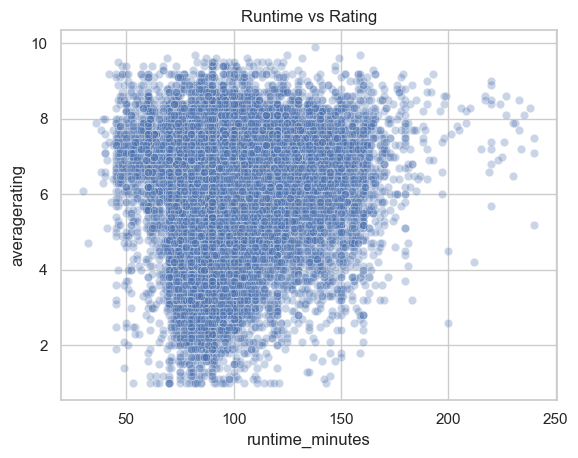

In [111]:
sns.scatterplot(data=df_filtered_log, x='runtime_minutes', y='averagerating', alpha=0.3)
plt.title("Runtime vs Rating")

##### Almost all the movies have a duration between 50 to 150 minutes and are often rated between 2 to 8

Let's close the connection

In [112]:
conn.close()

# Conclusion
Based on the data we explored, we discovered several important patterns that can help guide the new movie studio’s decisions:

### 1) Certain Genres Are More Liked
Documentary, Biography, Music, Musical, Sport, Animation, Drama are the top five one.
### 2) Duration Doesn't Matters But There Is A Standard
The success of the film is not really depend on its duration, but movies tend to last around 50 to 150 minutes according to the data.
### 3) I strongly suggest to avoid Adult Movies
Adult movies are more likely to have lower rating which is not great in terms of business marketing

# Next Step ?
That would be to take a deeper look at the best genres (like Documentary or Biography) to understand what makes them successful.
and out more about who watches these movies and what they like by looking at online trends or doing surveys. Afterwards Start a mini project as a test.

# Code Quality
All code was written in Python using industry-standard libraries such as Pandas, Matplotlib, and Seabornn. Key characteristics of the codebase include:

- Modularity: Functions are separated for loading, cleaning, analyzing, and visualizing data to promote reusability.
- Documentation: Inline comments and docstrings are used to clarify purpose and logic.
- Efficiency: Vectorized operations and optimized queries reduce runtime for large datasets.
- Reproducibility: Code is organized in a Jupyter Notebook, allowing anyone to rerun the analysis with minimal setup.
- Version Control: Git was used to track changes and manage collaboration.